In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

imgs = [ cv2.cvtColor(cv2.imread("./Pics/Total/"+str(i+1)+".jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) for i in range(14)]

In [ ]:
plt.imshow( imgs[1])


C:\Users\Mayaank\AppData\Local\Temp\ipykernel_8992\1439032723.py:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


((1892.878662109375, 1832.667724609375),
 (296.0089416503906, 957.2736206054688),
 89.79165649414062)

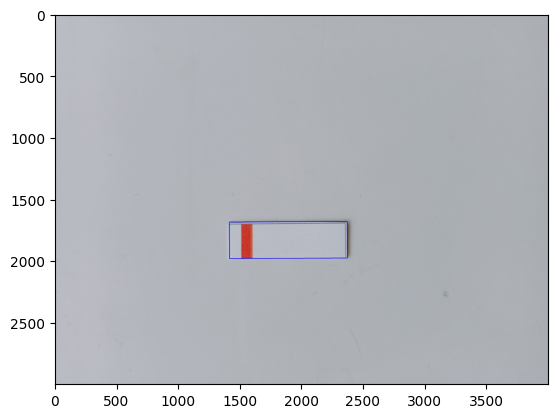

In [50]:
# plt.figure(figsize=(20,15))
# f, axarr = plt.subplots(3,5) 

# for i in range(14):
#     edges = cv2.Canny(imgs[i],30,40)
#     axarr[i%3][i//3].imshow(edges,   cmap='gray')
    
# plt.show()
img=cv2.cvtColor(cv2.imread("Pics/Total/10.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img,150,200)
# plt.imshow(img)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
imgcpy = img.copy()

rect = cv2.minAreaRect(np.concatenate(contours))
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(imgcpy, [box], -1, (0,0,255), 3)
plt.imshow(imgcpy)
rect


C:\Users\Mayaank\AppData\Local\Temp\ipykernel_8992\1852546893.py:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box1 = np.int0(box1)
C:\Users\Mayaank\AppData\Local\Temp\ipykernel_8992\1852546893.py:24: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box2 = np.int0(box2)


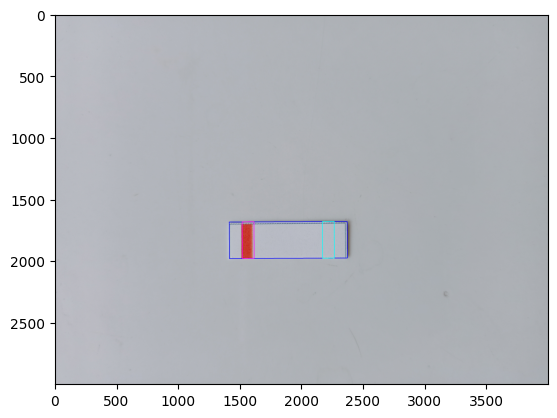

In [51]:
center = np.array(rect[0])
len_big = max(rect[1])
len_small = min(rect[1])
# len_big = rect[1][0]
# len_small = rect[1][1]
radius=  int(0.15* len_small)
angle = rect[2]
rot = np.array([[np.cos(angle*np.pi/180), -np.sin(angle*np.pi/180)],
                [np.sin(angle*np.pi/180), np.cos(angle* np.pi/180)]])
center1 = center + rot@ np.array([1,0] if rect[1][0] > rect[1][1] else [0,1]) * len_big * 0.34 
center2 = center - rot@ np.array([1,0] if rect[1][0] > rect[1][1] else [0,1]) * len_big * 0.34 
center1 = list(map(int, center1))
center2 = list(map(int, center2))

box_size = (len_small, len_big*0.1)
if rect[1][0] < rect[1][1]:
    box_size = box_size[::-1]
rect1  = (center1, box_size, (angle + 90)%360)
box1 = cv2.boxPoints(rect1)
box1 = np.int0(box1)

rect2  = (center2, box_size, (angle + 90)%360)
box2 = cv2.boxPoints(rect2)
box2 = np.int0(box2)
cv2.drawContours(imgcpy, [box1], -1, (255,0,255), 3)
cv2.drawContours(imgcpy, [box2], -1, (0,255,255), 3)
plt.imshow(imgcpy)



In [52]:
imgcpy_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask1 = np.zeros(imgcpy.shape[: 2], np.uint8)
cv2.drawContours(mask1, [box1], -1, (255,255,255), -1)
mean1 = cv2.mean(imgcpy_hsv, mask=mask1)
# plt.imshow(mask1)
mask2 = np.zeros(imgcpy.shape[: 2], np.uint8)
cv2.drawContours(mask2, [box2], -1, (255,255,255), -1)
mean2 = cv2.mean(imgcpy_hsv, mask=mask2)

mean1, mean2

((22.507601527247484, 160.90697674418607, 194.6174245053801, 0.0),
 (110.87844498438044, 18.113675807011457, 193.5502950364457, 0.0))

In [121]:
def get_intensity(img):
    edges = cv2.Canny(img,150,200)
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imgcpy = img.copy()
    rect = cv2.minAreaRect(np.concatenate(contours))
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    cv2.drawContours(imgcpy, [box], -1, (0,0,255), 3)
    # plt.imshow(imgcpy)
    center = np.array(rect[0])
    len_big = max(rect[1])
    len_small = min(rect[1])
    angle = rect[2]
    rot = np.array([[np.cos(angle*np.pi/180), -np.sin(angle*np.pi/180)],
                    [np.sin(angle*np.pi/180), np.cos(angle* np.pi/180)]])
    center1 = center + rot@ np.array([1,0] if rect[1][0] > rect[1][1] else [0,1]) * len_big * 0.34 
    center2 = center - rot@ np.array([1,0] if rect[1][0] > rect[1][1] else [0,1]) * len_big * 0.34 
    center1 = list(map(int, center1))
    center2 = list(map(int, center2))

    # box_size = (len_small, len_big*0.1)
    box_size = (len_small*0.8, len_big*0.08)
    if rect[1][0] < rect[1][1]:
        box_size = box_size[::-1]
    rect1  = (center1, box_size, (angle + 90)%360)
    box1 = cv2.boxPoints(rect1)
    box1 = np.intp(box1)

    rect2  = (center2, box_size, (angle + 90)%360)
    box2 = cv2.boxPoints(rect2)
    box2 = np.intp(box2)
    cv2.drawContours(imgcpy, [box1], -1, (255,0,255), 3)
    cv2.drawContours(imgcpy, [box2], -1, (0,255,255), 3)
    imgcpy_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask1 = np.zeros(imgcpy.shape[: 2], np.uint8)
    cv2.drawContours(mask1, [box1], -1, (255,255,255), -1)
    mean1 = cv2.mean(imgcpy_hsv, mask=mask1)
    # plt.imshow(mask1)
    mask2 = np.zeros(imgcpy.shape[: 2], np.uint8)
    cv2.drawContours(mask2, [box2], -1, (255,255,255), -1)
    mean2 = cv2.mean(imgcpy_hsv, mask=mask2)
    intensity  =abs(mean1[1] - mean2[1])
    
    # print("Rect :", rect)
    # print("Mean 1 :", mean1)
    # print("Mean 2 :", mean2)
    # print("Intensity : ", intensity )
    plt.title (f"Intensity : {intensity:.3f}" )
    plt.imshow(imgcpy)
    plt.show()


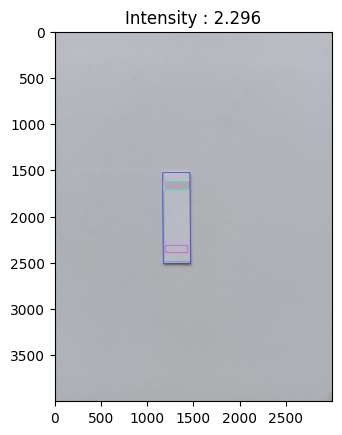

In [122]:
for i in range(1):
    get_intensity(imgs[i])

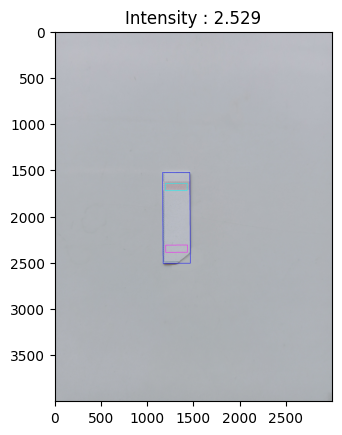

In [123]:
img_cut=cv2.cvtColor(cv2.imread("Pics/1_cut.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
get_intensity(img_cut)